In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df=pd.read_csv(r"C:\Users\Navneet singh\Downloads\dreaddit-train.csv")
df.head(10)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6,2.851935,-0.117262


In [3]:
df1=df[['subreddit','text','label']]
df1.head()

,subreddit,text,label
0,ptsd,"He said he had not felt that way before, sugge...",1
1,assistance,"Hey there r/assistance, Not sure if this is th...",0
2,ptsd,My mom then hit me with the newspaper and it s...,1
3,relationships,"until i met my new boyfriend, he is amazing, h...",1
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1


In [4]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [5]:
df1.text = df1['text'].apply(data_processing)

C:\Users\Navneet singh\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
df1=df1.drop_duplicates('text')

In [7]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [8]:
df1[['subreddit','text']] = df1[['subreddit','text']].apply(lambda x: stemming(x))

In [9]:
df1.head()

,subreddit,text,label
0,ptsd,said felt way suggeted go rest trigger ahead y...,1
1,assistance,hey rassistance sure right place post goes im ...,0
2,ptsd,mom hit newspaper shocked would knows dont lik...,1
3,relationships,met new boyfriend amazing kind sweet good stud...,1
4,survivorsofabuse,october domestic violence awareness month dome...,1


In [10]:
mytext=df1.text[20]
mytext

'still holds back life still finds ways get yet still talk always feel worse ive tried blocking social media still finds ways get'

In [11]:
import re

In [12]:
def preprocessing(text):
    text=re.sub(r'[^\w\s\']',"",text)
    text=re.sub(' +',' ',text).lower()
    return text

In [13]:
preprocessing(mytext)

'still holds back life still finds ways get yet still talk always feel worse ive tried blocking social media still finds ways get'

In [14]:
df1['processed']=df1['text'].map(preprocessing)

In [15]:
df1.head(20)

,subreddit,text,label,processed
0,ptsd,said felt way suggeted go rest trigger ahead y...,1,said felt way suggeted go rest trigger ahead y...
1,assistance,hey rassistance sure right place post goes im ...,0,hey rassistance sure right place post goes im ...
2,ptsd,mom hit newspaper shocked would knows dont lik...,1,mom hit newspaper shocked would knows dont lik...
3,relationships,met new boyfriend amazing kind sweet good stud...,1,met new boyfriend amazing kind sweet good stud...
4,survivorsofabuse,october domestic violence awareness month dome...,1,october domestic violence awareness month dome...
5,relationships,think doesnt want put effort relationship work...,1,think doesnt want put effort relationship work...
6,domesticviolence,big company luckily didnt see time acted thoug...,0,big company luckily didnt see time acted thoug...
7,anxiety,cleared okay monday thinking humans brain work...,1,cleared okay monday thinking humans brain work...
8,relationships,actually give assistant half emergency fee com...,1,actually give assistant half emergency fee com...
9,assistance,feel like street life fucked head theres much ...,1,feel like street life fucked head theres much ...


In [16]:
df1['final']="__label__"+df1['subreddit'].astype(str)+"_"+df1['processed'].astype(str)

In [17]:
df1.head()

,subreddit,text,label,processed,final
0,ptsd,said felt way suggeted go rest trigger ahead y...,1,said felt way suggeted go rest trigger ahead y...,__label__ptsd_said felt way suggeted go rest t...
1,assistance,hey rassistance sure right place post goes im ...,0,hey rassistance sure right place post goes im ...,__label__assistance_hey rassistance sure right...
2,ptsd,mom hit newspaper shocked would knows dont lik...,1,mom hit newspaper shocked would knows dont lik...,__label__ptsd_mom hit newspaper shocked would ...
3,relationships,met new boyfriend amazing kind sweet good stud...,1,met new boyfriend amazing kind sweet good stud...,__label__relationships_met new boyfriend amazi...
4,survivorsofabuse,october domestic violence awareness month dome...,1,october domestic violence awareness month dome...,__label__survivorsofabuse_october domestic vio...


In [18]:
df.shape

(2838, 116)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train,test=train_test_split(df1,test_size=0.3,random_state=2022)

In [21]:
display(train.shape)
display(test.shape)

(1973, 5)

(846, 5)

In [22]:
train.to_csv(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\train_reviewfinal2edited.csv",columns=['final'],index=False,header=False)
test.to_csv(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\test_reviewfinal2edited.csv",columns=['final'],index=False,header=False)

In [23]:
import fasttext

In [24]:
myModel=fasttext.train_supervised(input=r"C:\Users\Navneet singh\Desktop\tillfasttextdata\train_reviewfinal2edited.csv")

In [25]:
myModel.test(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\test_reviewfinal2edited.csv")

(371, 0.03773584905660377, 0.03773584905660377)

In [38]:
train_data1 = train[~train['subreddit'].isin(['assistance', 'relationships', 'survivorsofabuse', 'homeless', 'almosthomeless', 'food_pantry'])]
test_data1 = test[~test['subreddit'].isin(['assistance', 'relationships', 'survivorsofabuse', 'homeless', 'almosthomeless', 'food_pantry'])]

In [39]:
train_data1.head()

,subreddit,text,label,processed,final
1992,ptsd,enraged said months ago maybe internet access ...,0,enraged said months ago maybe internet access ...,__label__ptsd_enraged said months ago maybe in...
266,anxiety,hello long long long time user paxil looking t...,0,hello long long long time user paxil looking t...,__label__anxiety_hello long long long time use...
1301,anxiety,hey ranxiety x200b im undergraduate student as...,0,hey ranxiety x200b im undergraduate student as...,__label__anxiety_hey ranxiety x200b im undergr...
1175,ptsd,hey friday woodworking competition everything ...,0,hey friday woodworking competition everything ...,__label__ptsd_hey friday woodworking competiti...
2218,domesticviolence,used forearm push plate eating counter glass b...,1,used forearm push plate eating counter glass b...,__label__domesticviolence_used forearm push pl...


In [40]:
test_data1.head()

,subreddit,text,label,processed,final
574,domesticviolence,relationship didnt really let go anywhere hell...,0,relationship didnt really let go anywhere hell...,__label__domesticviolence_relationship didnt r...
506,ptsd,never thought id situation like life screaming...,1,never thought id situation like life screaming...,__label__ptsd_never thought id situation like ...
846,domesticviolence,regardless didnt last long maybe half year rel...,0,regardless didnt last long maybe half year rel...,__label__domesticviolence_regardless didnt las...
1678,anxiety,thinking think anxiety seems boil either fear ...,1,thinking think anxiety seems boil either fear ...,__label__anxiety_thinking think anxiety seems ...
2093,anxiety,cant begin summarise feel want spend rest life...,1,cant begin summarise feel want spend rest life...,__label__anxiety_cant begin summarise feel wan...


In [41]:
train_data1.to_csv(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\train_reviewfinal3edited.csv",columns=['final'],index=False,header=False)
test_data1.to_csv(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\test_reviewfinal3edited.csv",columns=['final'],index=False,header=False)

In [42]:
myModel1=fasttext.train_supervised(input=r"C:\Users\Navneet singh\Desktop\tillfasttextdata\train_reviewfinal3edited.csv")

In [43]:
myModel1.test(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\test_reviewfinal3edited.csv")

(190, 0.07368421052631578, 0.07368421052631578)

In [44]:
train_data2 = train[~train['subreddit'].isin(['assistance', 'domesticviolence','stress','relationships', 'survivorsofabuse', 'homeless', 'almosthomeless', 'food_pantry'])]
test_data2 = test[~test['subreddit'].isin(['assistance','domesticviolence','stress', 'relationships', 'survivorsofabuse', 'homeless', 'almosthomeless', 'food_pantry'])]

In [45]:
train_data2.head()

,subreddit,text,label,processed,final
1992,ptsd,enraged said months ago maybe internet access ...,0,enraged said months ago maybe internet access ...,__label__ptsd_enraged said months ago maybe in...
266,anxiety,hello long long long time user paxil looking t...,0,hello long long long time user paxil looking t...,__label__anxiety_hello long long long time use...
1301,anxiety,hey ranxiety x200b im undergraduate student as...,0,hey ranxiety x200b im undergraduate student as...,__label__anxiety_hey ranxiety x200b im undergr...
1175,ptsd,hey friday woodworking competition everything ...,0,hey friday woodworking competition everything ...,__label__ptsd_hey friday woodworking competiti...
149,ptsd,know means dive oneself asked confirmed deeper...,0,know means dive oneself asked confirmed deeper...,__label__ptsd_know means dive oneself asked co...


In [47]:
train_data2.to_csv(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\train_reviewfinal4edited.csv",columns=['final'],index=False,header=False)
test_data2.to_csv(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\test_reviewfinal4edited.csv",columns=['final'],index=False,header=False)

In [48]:
myModel1=fasttext.train_supervised(input=r"C:\Users\Navneet singh\Desktop\tillfasttextdata\train_reviewfinal4edited.csv")

In [49]:
myModel1.test(r"C:\Users\Navneet singh\Desktop\tillfasttextdata\test_reviewfinal4edited.csv")

(161, 0.07453416149068323, 0.07453416149068323)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df1.text, 
    df1.subreddit, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    
)

In [54]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2255,)
Shape of X_test:  (564,)


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  almosthomeless       0.19      0.18      0.18        17
         anxiety       0.33      0.61      0.43        96
      assistance       0.45      0.47      0.46        55
domesticviolence       0.27      0.27      0.27        56
     food_pantry       0.00      0.00      0.00         6
        homeless       0.40      0.19      0.26        31
            ptsd       0.42      0.38      0.40       124
   relationships       0.47      0.42      0.45       123
          stress       0.00      0.00      0.00         6
survivorsofabuse       0.14      0.04      0.06        50

        accuracy                           0.37       564
       macro avg       0.27      0.26      0.25       564
    weighted avg       0.36      0.37      0.36       564



C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  almosthomeless       0.00      0.00      0.00        17
         anxiety       0.64      0.52      0.57        96
      assistance       0.83      0.09      0.16        55
domesticviolence       1.00      0.02      0.04        56
     food_pantry       0.00      0.00      0.00         6
        homeless       0.00      0.00      0.00        31
            ptsd       0.40      0.79      0.53       124
   relationships       0.46      0.87      0.60       123
          stress       0.00      0.00      0.00         6
survivorsofabuse       0.00      0.00      0.00        50

        accuracy                           0.46       564
       macro avg       0.33      0.23      0.19       564
    weighted avg       0.48      0.46      0.36       564



C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  almosthomeless       0.00      0.00      0.00        17
         anxiety       0.58      0.67      0.62        96
      assistance       0.55      0.51      0.53        55
domesticviolence       0.48      0.23      0.31        56
     food_pantry       0.00      0.00      0.00         6
        homeless       0.67      0.45      0.54        31
            ptsd       0.46      0.65      0.54       124
   relationships       0.49      0.71      0.58       123
          stress       0.00      0.00      0.00         6
survivorsofabuse       0.50      0.02      0.04        50

        accuracy                           0.51       564
       macro avg       0.37      0.32      0.32       564
    weighted avg       0.49      0.51      0.47       564



C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  2,  6,  1,  0,  4,  2,  0,  0,  0],
       [ 0, 66,  2,  0,  0,  0, 18, 14,  0,  0],
       [ 0,  1, 37,  0,  0,  1, 11,  7,  0,  1],
       [ 0,  4,  2,  9,  0,  0, 18, 29,  0,  1],
       [ 0,  1,  3,  0,  0,  0,  2,  1,  0,  0],
       [ 0,  5,  7,  1,  0,  8,  8,  5,  0,  0],
       [ 0, 25,  1,  3,  0,  0, 70, 17,  0,  1],
       [ 0, 12,  2,  2,  0,  0,  9, 86,  0,  0],
       [ 0,  5,  2,  0,  0,  0,  2,  2,  1,  0],
       [ 0,  6,  1,  2,  0,  0, 15, 20,  0,  3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

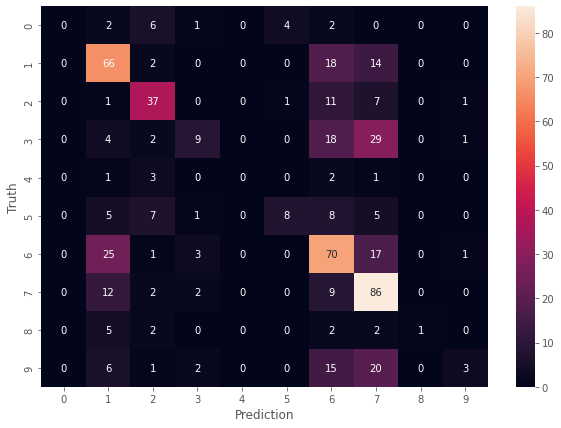

In [63]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_data2.text, 
    train_data2.subreddit, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=20,
)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxiety       0.71      0.71      0.71        70
        ptsd       0.75      0.75      0.75        81

    accuracy                           0.74       151
   macro avg       0.73      0.73      0.73       151
weighted avg       0.74      0.74      0.74       151



In [96]:
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxiety       0.76      0.53      0.62        70
        ptsd       0.68      0.85      0.75        81

    accuracy                           0.70       151
   macro avg       0.72      0.69      0.69       151
weighted avg       0.71      0.70      0.69       151



In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())])
#2. fit with X_train and y_train
clf.fit(X_train, y_train)
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)
#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxiety       0.60      0.69      0.64        70
        ptsd       0.69      0.60      0.64        81

    accuracy                           0.64       151
   macro avg       0.65      0.65      0.64       151
weighted avg       0.65      0.64      0.64       151



C:\Users\Navneet singh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
train_data2.shape

(752, 5)

In [4]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nbconvert--allow-chromium-download

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nbconvert--allow-chromium-download (from versions: none)
ERROR: No matching distribution found for nbconvert--allow-chromium-download
